# Project 2 - Ames Housing Data and Kaggle Challenge

_Ang Sheng Jun DSI14_  

---
### Problem Statement 
Create a regression model based on the Ames Housing Dataset to predict the price of a house at sale.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('fivethirtyeight')

%matplotlib inline

### Load the Data
___ 
Training dataset is from __[DSI-US-6 Project 2 Regression Challenge](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)__. The dataset has some cell values that have 'NA' to represent lack of particular feature. Therefore, read in .csv file with keep_default_na=False so that only actual NaN values are used for parsing.

In [2]:
df = pd.read_csv('../datasets/train.csv',keep_default_na=False)
#df = pd.read_csv('../datasets/train.csv')
pd.set_option('display.max_columns', None)
# to reset columns, use pd.reset_option(“max_columns”)
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957,Unf,2,484,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


### Basic EDA and Data Cleaning
---

In [3]:
# Change Headers to lower_case.
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000


In [4]:
# Replace blank values with NaN
df.replace("",np.nan,inplace=True)

In [5]:
# Overview of datatypes for loaded dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2051 non-null   int64 
 1   pid              2051 non-null   int64 
 2   ms_subclass      2051 non-null   int64 
 3   ms_zoning        2051 non-null   object
 4   lot_frontage     1721 non-null   object
 5   lot_area         2051 non-null   int64 
 6   street           2051 non-null   object
 7   alley            2051 non-null   object
 8   lot_shape        2051 non-null   object
 9   land_contour     2051 non-null   object
 10  utilities        2051 non-null   object
 11  lot_config       2051 non-null   object
 12  land_slope       2051 non-null   object
 13  neighborhood     2051 non-null   object
 14  condition_1      2051 non-null   object
 15  condition_2      2051 non-null   object
 16  bldg_type        2051 non-null   object
 17  house_style      2051 non-null   

Our training dataset is 2051 rows by 81 columns. Comparing against the data dictionary, several columns are read in as object type due to NaN values.
For example, lot_frontage is read in as string as some of its cells contain non-numerical values. We will change the column type to float.

In [6]:
# Change column type to float
df['lot_frontage'] = pd.to_numeric(df['lot_frontage'])
df['lot_frontage'].dtypes

dtype('float64')

In [7]:
# Change the following columns of object type to float
df['mas_vnr_area'] = df['mas_vnr_area'].astype(float)
df['bsmtfin_sf_1'] = df['bsmtfin_sf_1'].astype(float)

df['bsmtfin_sf_2'] = df['bsmtfin_sf_2'].map(lambda val: float(val))
df[['bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath','garage_yr_blt','garage_cars','garage_area']] =\
df[['bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath','garage_yr_blt','garage_cars','garage_area']]\
.apply(pd.to_numeric,axis=1)

df['garage_cars'].dtypes

dtype('float64')

In [8]:
# check datatype conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [9]:
null_col = df.isna().sum().sort_values()
null_col[null_col>0]

bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_qual           1
bsmtfin_sf_1        1
garage_qual         1
bsmtfin_sf_2        1
garage_area         1
garage_cars         1
garage_finish       1
bsmtfin_type_1      1
bsmt_cond           1
garage_cond         1
bsmt_full_bath      2
bsmt_half_bath      2
bsmtfin_type_2      2
bsmt_exposure       4
mas_vnr_area       22
mas_vnr_type       22
garage_yr_blt     114
lot_frontage      330
dtype: int64

In [10]:
# Summary Statistics
df.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


No negative values observed. There is significant interval between max and 75percentile for some columns. This could indicate presence of outliers. For example, mas_vnr_area: Masonry veneer area has a significant difference between 75thpercentile (161 sq_ft) and max. (1600 sq_ft). In particular, 621sq_ft at mean+3std. Similar observations on difference between 75thpercentile and max.for:
- bsmtfin_sf_1: basement type 1 finished area,  
- bsmtfin_sf_2: basement type 2 finished area,
- bsmt_unf_sf: unfinished basement area,
- total_bsmt_sf: total basement area, (\potential representative candidate for basement area)
- 1st_flr_sf: First floor area
- 2nd_flr_sf: Second floor area
- low_qual_fin_sf: Low quality finished area (all floors)
- gr_liv_area: Above grade (ground) living area (\potential representative candidate for living area)
- wood_deck_sf: Wood deck area
- open_porch_sf: Open porch area
- enclosed_porch: Enclosed porch area
- 3ssn_porch: Three season porch area
- screen_porch: Screen porch area (\the areas of wood deck to screen porch seem indpendent from each other. Each variable are equally suited as potential predictors to target, pending review via heatmap.)
- pool_area
- misc_value: value of miscellaneous features (\we can infer these as luxury features atypical of residential homes from data dict descriptions)
- saleprice

In [11]:
df.loc[df['total_bsmt_sf'] == 6110]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,160000


total_bsmt_sf is sum of all basement areas. Would consider it a potential representative candidate for all basement area variable, if required.

In [12]:
df.loc[df['low_qual_fin_sf'] == 1064]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
828,661,535381040,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,4,5,1915,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1313.0,1313.0,GasA,TA,Y,SBrkr,1313,0,1064,2377,0.0,0.0,2,0,3,1,Gd,8,Min2,1,TA,Detchd,1954.0,Unf,2.0,528.0,TA,TA,Y,0,0,432,0,0,0,NA,NA,NA,0,6,2009,WD,142900


Similarly for living area, gr_liv_area is the total of 1st_flr_sf,	2nd_flr_sf	and low_qual_fin_sf.

In [13]:
df.loc[df['wood_deck_sf'] < 1000].head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000


wood_deck_sf and other outdoor porch feature areas are independent from each other.

Observe that saleprice has data majority below 40_000 range; expect that the model would not perform well for saleproce predicton above 40_000.

### Dealing with Null values. Drop NaN, ignore or impute?

From the list of columns with null values, we can further look at it by cluster. Let's start with basement columns.

In [15]:
# Check the null value row for bsmt_unf_sf
df.loc[df['bsmt_unf_sf'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [16]:
# define a function to check for other basement-related columns with null
def row_null_id(column):
    return df.loc[df[column].isnull()]

In [17]:
# Check null for basement related columns
row_null_id('total_bsmt_sf')
#row_null_id('bsmt_qual')
#row_null_id('bsmtfin_sf_1')
#row_null_id('bsmtfin_sf_2')
#row_null_id('bsmt_cond')
#row_null_id('bsmtfin_type_1')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


A comparison through the rest ('bsmt_qual', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmtfin_type_1', 'bsmt_cond', 'bsmtfin_type_1') converges on single row indexed 1327. We could drop these null cells, since it constitute a small percentage of overall observations (1 out of 2051).

In [18]:
# Check null for basement-bath related columns
#row_null_id('bsmt_full_bath')
row_null_id('bsmt_half_bath')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NA,NA,NA,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


For row 616, from bstmt_qual = NA, we can deduce this property has no basement. So we can replace the NaN values for 'bsmt_full_bath' and 'bsmt_half_bath' as 0 (reference to data dict).

In [19]:
df['bsmt_full_bath'].dtypes

dtype('float64')

In [20]:
# Replace 'bsmt_full_bath' at index 616 to 0.0
df.iloc[616, 48] = 0.0

In [21]:
# Replace 'bsmt_half_bath' at index 616 to 0.0
df.iloc[616, 49] = 0.0

In [22]:
# Check null replacement for basement-bath related columns at index 616 done
# Not expect to see index 616 returned
row_null_id('bsmt_half_bath')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [23]:
# Check null for basement-finish related columns
row_null_id('bsmtfin_type_2')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1147,445,528142130,20,RL,85.0,10655,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,10,2009,WD,284000
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


For row 1147, there is basement2 as indicated by its area from column bsmtfin_sf_2. We could impute a mode for this row (categorical variable) or either drop this row.

In [24]:
print(df['bsmtfin_type_2'].dtypes)
# Most occurring basement finish type 2
df['bsmtfin_type_2'].mode()

object


0    Unf
dtype: object

In [25]:
# Check the cell value of interest
df.iloc[1147].loc['bsmtfin_type_2']

nan

In [26]:
# Update and Check
# note targetted cell value doesn't work with below line of code.
# df.iloc[1147].loc['bsmtfin_type_2'].fillna('Unf',inplace=True) 
df['bsmtfin_type_2'].fillna('Unf',inplace=True)
df.iloc[1147].loc['bsmtfin_type_2']

'Unf'

We note that this will update the row for 1327, but it is fine. Reason being there are other cells along row 1327 we can leverage to remove row 1327 later on. 

In [27]:
row_null_id('bsmt_exposure')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,Unf,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000
1456,1797,528458090,60,FV,81.0,10411,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NA,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NA,NA,NA,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NA,NA,NA,0,2,2006,WD,192500


For rows 1456, 1547, 1997, there is basement as indicated by bsmt_qual. We could impute a mode for bsmt_exposure for these rows (categorical variable).

In [28]:
print(df['bsmt_exposure'].dtypes)
# Most occurring basement finish type 2
df['bsmt_exposure'].mode()

object


0    No
dtype: object

In [29]:
# Update and Check
df['bsmt_exposure'].fillna('No',inplace=True)
df.iloc[1456].loc['bsmt_exposure']

'No'

Again, this will update the row for 1327, but still acceptable. Reason being there are other cells (e.g. bsmtfin_sf_1) along row 1327 we can leverage to remove row 1327 later on.

In [30]:
# Check null entries for garage-related columns
row_null_id('garage_qual')
#row_null_id('garage_area')
#row_null_id('garage_cars')
#row_null_id('garage_finish')
#row_null_id('garage_cond')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


Similarly, for garage-related null cells, all converge to single row indexed 1712. We couldn't deduce if there is a garage from garage_qual. Again we could choose to drop these null cells.

In [31]:
# Check null entries for masonary veneer
row_null_id('mas_vnr_area')
#row_null_id('mas_vnr_type')      

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
22,2393,528142010,60,RL,103.0,12867,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NA,NA,NA,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NA,NA,NA,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NA,NA,NA,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NA,NA,NA,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,32,0,0,0,0,0,NA,NA,NA,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,NA,NA,NA,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NA,NA,NA,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NA,NA,NA,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NA,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,NA,NA,NA,0,11,200

Same 22 rows from null check for masonary veneer type and area. From data dict, we can deduce these as absence of masonary veneer. Impute masonary veneer type as None, masonary area as 0 for these NaN values.

In [32]:
# Update and Check for mas_vnr_area
df['mas_vnr_area'].fillna(0.0,inplace=True)
df.iloc[22].loc['mas_vnr_area']

0.0

In [33]:
# Update and Check for mas_vnr_type
print(df['mas_vnr_type'].dtypes)
df['mas_vnr_type'].fillna('None',inplace=True)
df.iloc[22].loc['mas_vnr_type']

object


'None'

In [34]:
# Check null entries for garage-related columns
row_null_id('garage_yr_blt')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
28,2243,911103060,190,C (all),75.0,8250,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,133,0,0,0,NA,NA,NA,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,200,26,0,0,0,0,NA,NA,NA,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,0,30,0,0,0,0,NA,NA,NA,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,0,176,0,0,NA,NA,NA,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,144,0,0,0,NA,NA,NA,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,NA,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,912,0,1824,0.0,0.0,2,2,4,2,TA,8,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,128,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,139000
2010,2880,911175410,30,C (all),69.0,12366,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,23,0,0,0,NA,NA,NA,0,10,2006,WD,51689
2027,2628,535456010,90,RL,75.0,8512,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1556.0,1556.0,GasA,TA,Y,SBrkr,1556,0,0,1556,0.0,0.0,2,0,4,2,TA,8,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,0,0,0,0,0,0,NA,NA,NA,0,9,2006,WD,119000
2039,2288,923228220,160,RM,21.0,1495,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,

From garage_type information, we can deduce these NaN values in garage_yr_blt are because of absence of garage. 114 observations comprise ~5% of total 2051 observations. We lose signifcant observations if we choose to just drop these null value cells. We could replace these with 0.0 to represent absence of garage. For regression, we will need to be mindful of this imputation aspect, if we are to use this variable later on. One mitigation is to use other correlated variables in place of this one. This will depend on the correlation analysis later on.

In [35]:
# Update and Check for garage_yr_blt
print(df['garage_yr_blt'].dtypes)
df['garage_yr_blt'].fillna(0.0,inplace=True)
df.iloc[28].loc['garage_yr_blt']

float64


0.0

In [36]:
# Check null entries for lot_frontage
row_null_id('lot_frontage')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NA,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NA,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,NA,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NA,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,Y,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,7,2008,WD,198000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,560,532376110,20,RL,NaN,7791,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,1Fam,1Story,5,8,1963,1995,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,TA,TA,No,ALQ,624.0,Unf,0.0,288.0,912.0,GasA,Ex,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NA,Attchd,1963.0,RFn,1.0,300.0,TA,TA,Y,0,0,0,0,0,0,NA,GdWo,NA,0,10,2009,WD,129000
2022,2872,909475020,20,RL,NaN,16381,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,5,1969,1969,Gable,CompShg,Plywood,Plywood,BrkFace,312.0,Gd,Gd,CBlock,TA,TA,Av,Rec,1110.0,Unf,0.0,734.0,1844.0,GasA,Gd,Y,SBrkr,1844,0,0,1844,1.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1969.0,RFn,2.0,540.0,TA,TA,Y,0,73,216,0,0,0,NA,NA,NA,0,12,2006,WD,223000
2028,2526,534127190,20,RL,NaN,20781,Pave,NA,IR2,Lvl,AllPub,CulDSac,Gtl,NWAmes,PosN,Norm,1Fam,1Story,7,7,1968,2003,Hip,CompShg,BrkFace,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,297.0,Rec,68.0,1203.0,1568.0,GasA,TA,Y,SBrkr,2156,0,0,2156,0.0,0.0,2,0,3,1,TA,9,Typ,1,Gd,Attchd,1968.0,RFn,2.0,508.0,Gd,TA,Y,0,80,0,290,0,0,NA,NA

From lot_frontage refers to the linear feet of street connected to property. From street information, we can deduce there is lot_frontage. Observing the potential presence of outliers from summary statistics for lot_frontage, we can use median value to impute for these missing values.

In [41]:
df['lot_frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [42]:
df['lot_frontage']
# Update and Check for 'lot_frontage'
print(df['lot_frontage'].dtypes)
df['lot_frontage'].fillna(68.0,inplace=True)
df.iloc[0].loc['lot_frontage']

float64


68.0

In [43]:
# Check null values progress
null_col = df.isna().sum().sort_values()
null_col[null_col>0]

garage_qual       1
bsmtfin_sf_2      1
bsmt_unf_sf       1
total_bsmt_sf     1
bsmt_cond         1
bsmt_qual         1
bsmtfin_type_1    1
bsmt_half_bath    1
garage_finish     1
garage_cars       1
bsmt_full_bath    1
garage_cond       1
garage_area       1
bsmtfin_sf_1      1
dtype: int64

In [45]:
# Drop null values (we should be left with 2051-2 rows)
print(df.shape)
df.dropna(inplace=True)
df.shape

(2051, 81)


(2049, 81)

In [50]:
# Save cleaned train data
df.to_csv('../datasets/train_Clean.csv')

### Variables selection as predictors of saleprice

On building a regression model to best predict salesprice, we want to identify the housing characteristics are strongly associated with perceived value of the property. Given 80 variables, we want to select and use max. 25-30 variables. The study of the data dict is useful for prelim shortlisting of variables for further review. We do this as may not be tangible to encode all categorical variables before reviewing for correlations (consider similar data cleaning to be applied for test dataset).

In general, the variables informs on location, neighbourhood, housing type and exterior, basement, heating and cooling, living space and functionality, fireplace, garage, porch and pool, miscellaneous features, time of sale and sale-type.

Some variables are of categorical nature, we note this and shall revist encoded categorical variables when we screen them for potential predictors to target. Start with correlation values to shortlist predictors. Our target is the salesprice.

In [52]:
# Stocktake numerical variables
df._get_numeric_data().columns

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice'],
      dtype='object')

In [61]:
# Correlation with target
cor_target = abs(df.corr()['saleprice']).sort_values()
cor_target

misc_val           0.007452
yr_sold            0.015215
bsmtfin_sf_2       0.016201
pool_area          0.023065
mo_sold            0.032034
low_qual_fin_sf    0.041702
bsmt_half_bath     0.045518
3ssn_porch         0.048670
id                 0.051360
ms_subclass        0.087881
overall_cond       0.096209
kitchen_abvgr      0.125670
screen_porch       0.134411
enclosed_porch     0.135695
bedroom_abvgr      0.136555
bsmt_unf_sf        0.190123
2nd_flr_sf         0.248460
pid                0.254465
garage_yr_blt      0.259166
half_bath          0.282595
bsmt_full_bath     0.282880
lot_area           0.296312
lot_frontage       0.326220
wood_deck_sf       0.326365
open_porch_sf      0.333123
bsmtfin_sf_1       0.423583
fireplaces         0.470740
mas_vnr_area       0.503417
totrms_abvgrd      0.503509
full_bath          0.537913
year_remod/add     0.550142
year_built         0.571726
1st_flr_sf         0.618345
total_bsmt_sf      0.628894
garage_cars        0.648007
garage_area        0

Overall_qual, gr_liv_area, garage_area, garage_cars, total_bsmt_sf, 1st_flr_sf, year_built, year_remod/add, mas_vnr_area, totrms_abvgrd, full_bath are potential relevant predictors. 


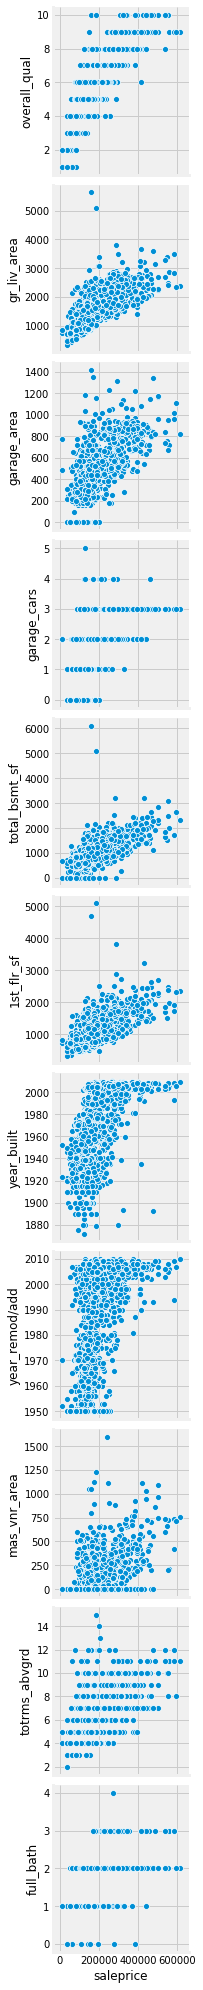

In [64]:
# Check linearity of relevant predictors to target
sns.pairplot(df, y_vars=['overall_qual','gr_liv_area','garage_area','garage_cars','total_bsmt_sf','1st_flr_sf',\
                         'year_built','year_remod/add','mas_vnr_area','totrms_abvgrd','full_bath'], x_vars=['saleprice']);

In [68]:
df_heatmap1 = df[['overall_qual','gr_liv_area','garage_area','garage_cars','total_bsmt_sf','1st_flr_sf',\
                 'year_built','year_remod/add','mas_vnr_area','totrms_abvgrd','full_bath','saleprice']]

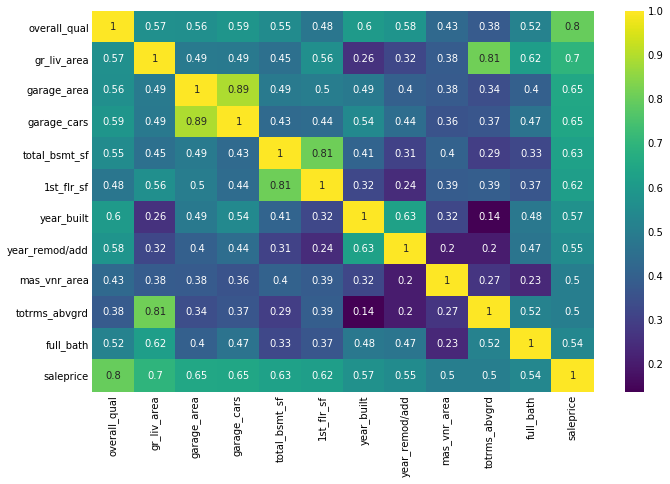

In [81]:
# Check collinearity among variables
plt.figure(figsize=(10,7))
sns.heatmap(df_heatmap1.corr(), annot=True, cmap=plt.cm.viridis)
plt.show()

**Shortlise numeric predictors (round1)**: overall_qual, gr_liv_area, garage_area, total_bsmt_sf, year_built, mas_vnr_area

High corr value between 
- gr_liv_area and 1st_flr_sq. Use gr_liv_area
- garage_area and garage_cars. Use garage_area
- year_built and year_remod/add. Use year_built
- gr_liv_area, totrms_abvgrd, full_bath. Use gr_liv_area.

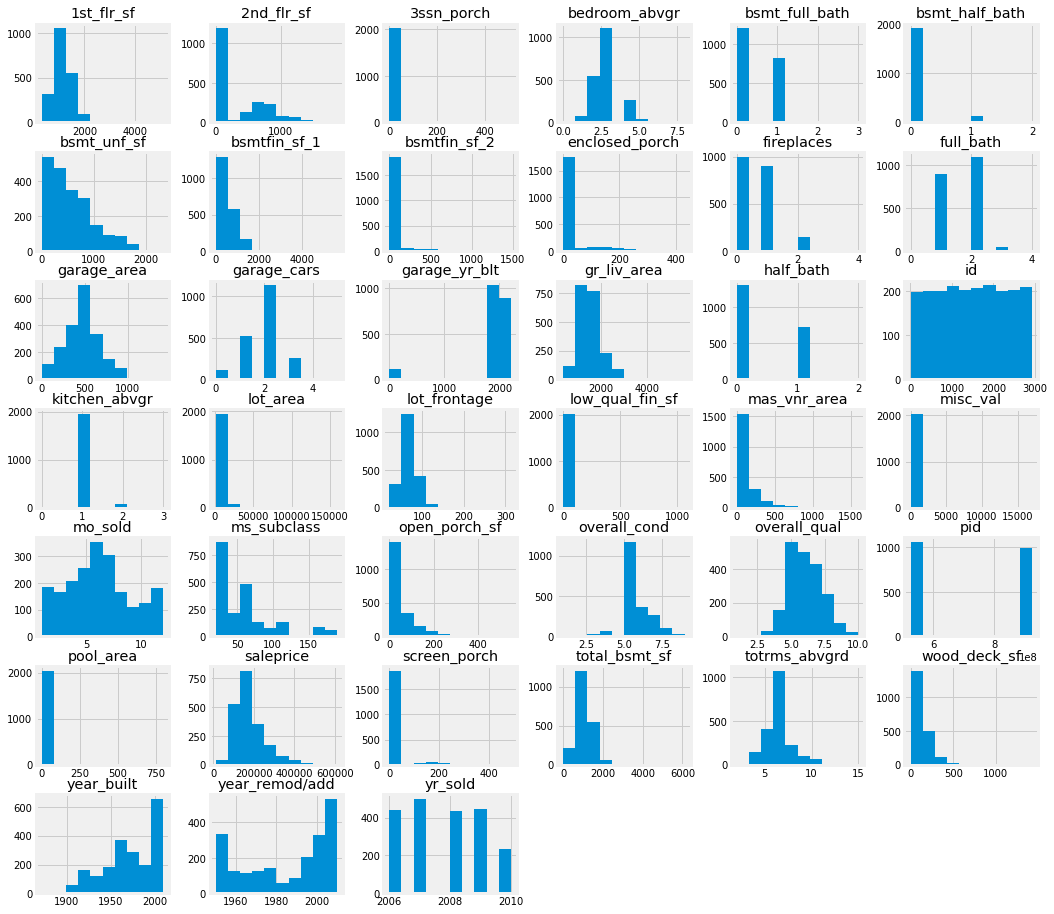

In [53]:
# Histogram for numerical columns
df.hist(figsize=(16,16));

Observe that saleprice has data majority below 40_000 range; expect that the model would not perform well for saleprice predicton above 40_000. Also the skew of saleprice and observations from summary stats indicate presence of outliers.

#### Checking for Outliers (shortlist_rd1 variables)

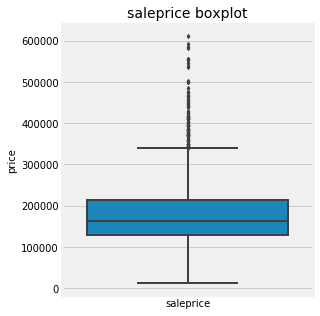

In [96]:
# Outliers in sale price
plt.figure(figsize = (4,5))
plt.title("saleprice boxplot", size=14)
sns.boxplot(data = df[['saleprice']], linewidth=2, fliersize=3)
plt.ylabel("price", size=10)
plt.xticks(size=10)
plt.yticks(size=10);

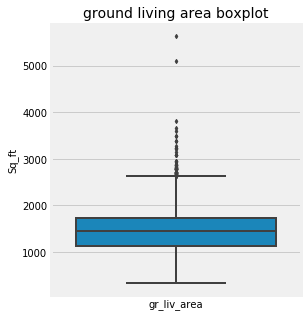

In [97]:
# Outliers in ground living area
plt.figure(figsize = (4,5))
plt.title("ground living area boxplot", size=14)
sns.boxplot(data = df[['gr_liv_area']], linewidth=2, fliersize=3)
plt.ylabel("Sq_ft", size=10)
plt.xticks(size=10)
plt.yticks(size=10);

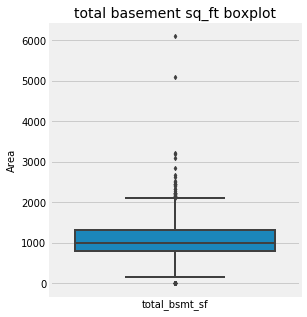

In [98]:
# Outliers in total_bsmt_sf
plt.figure(figsize = (4,5))
plt.title("total basement sq_ft boxplot", size=14)
sns.boxplot(data = df[['total_bsmt_sf']], linewidth=2, fliersize=3)
plt.ylabel("Area", size=10)
plt.xticks(size=10)
plt.yticks(size=10);

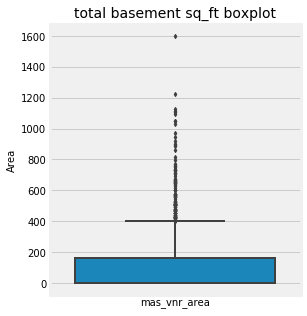

In [99]:
# Outliers in total_bsmt_sf
plt.figure(figsize = (4,5))
plt.title("total basement sq_ft boxplot", size=14)
sns.boxplot(data = df[['mas_vnr_area']], linewidth=2, fliersize=3)
plt.ylabel("Area", size=10)
plt.xticks(size=10)
plt.yticks(size=10);

This is a trend in the outliers of these predictor variables contributing to the outliers in price. If we don't account for these, the model is not expect to do well for higher saleprice predictions. 

WIP **One potential approach is to define a category to represent the outliers in each variables.**

In [ ]:
df.info()

In [ ]:
# Relationship between variables to target (saleprice)
# Linearity of 
wood_deck_sf 
open_porch_sf
enclosed_porch
3ssn_porch 
screen_porch     
pool_area

### Feature Engineering for Categorical Variables

In [ ]:
# code to check for outliers
df.describe()

In [ ]:
# Check shape of df

In [ ]:
# check null values presence

In [ ]:
# Outliers in miscellaneous feature value (price)
plt.figure(figsize = (6,6))
plt.title("Miscellaneous value boxplot", size=16)
sns.boxplot(data = df['misc_val'], linewidth=2, fliersize=3)
plt.ylabel("Price", size=10)
plt.xticks(size=10)
plt.yticks(size=10);

### Exploratory Visualizations

distributions
correlations
relationships to target

### Pre-processing

one hot encode, train/test/split, scale, consider automated feature selection

### Modeling, Inferential Visualizations and Model Evaluations

baseline score

### Data Cleaning for Test dataset

All data cleaning steps to apply for training dataset.

### Business Recommendations